In [84]:
#Importing the Necessary Libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [85]:
#Read the data of the weather from the csv file using read_csv function of pandas dataframe
data = pd.read_csv('./daily_weather.csv')

In [86]:
data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">Daily Weather Data Description</p>
<br>
The file **daily_weather.csv** is a comma-separated file that contains weather data.  This data comes from a weather station located in San Diego, California.  The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.<br><br>


In [87]:
#about various columns in the dataset.
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [88]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [89]:
data.tail()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
1090,1090,918.90,63.104,192.9,3.869906,207.3,5.212070,0.0,0.0,26.02,38.18
1091,1091,918.71,49.568,241.6,1.811921,227.4,2.371156,0.0,0.0,90.35,73.34
1092,1092,916.60,71.096,189.3,3.064608,200.8,3.892276,0.0,0.0,45.59,52.31
1093,1093,912.60,58.406,172.7,3.825167,189.1,4.764682,0.0,0.0,64.84,58.28
1094,1094,921.53,77.702,97.1,3.265932,125.9,4.451511,0.0,0.0,14.56,15.10


In [90]:
#Checking is there exists null values in the dataset or not
data[data.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Data Cleaning Steps<br><br></p>



In [91]:
del data['number']

In [92]:
#Calculatoing the amount of data in the dataset before removing the rows containg null values
before_rows = data.shape[0]
print(before_rows)

1095


In [93]:
#Removing the rows which contains the null values
data = data.dropna()

In [94]:
#Calculatoing the amount of data or say number of rows in the dataset after removing the rows containg null values
after_rows = data.shape[0]
print(after_rows)

1064


In [95]:
#Calculate how many rows are deleted which contains the Null Values
before_rows - after_rows

31

In [96]:
#Filter the values which contains more than 24.99 relative humidity at 3pm.
clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] >24.99) *1
clean_data['high_humidity_label'].head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [97]:
y = clean_data[['high_humidity_label']].copy()
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [98]:
clean_data['relative_humidity_3pm'].head()

,relative_humidity_3pm
0,36.160000
1,19.426597
2,14.460000
3,12.742547
4,76.740000


In [99]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [100]:
#Use 9am Sensor Signals as Features to Predict Humidity at 3pm
#Storing all the Morning features other than Humidity at 3 pm in the morning feature
morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

In [101]:
#Copying the values from the clean_data dataset to new dataset x which only consist of the Morning Feature Data
x=clean_data[morning_features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [102]:
y.columns

Index(['high_humidity_label'], dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Perform Test and Train split

<br><br></p>


In [103]:
#By using train_test_split we have split the data into traing dataset and testing datasets.
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=324)

In [104]:
X_train.shape

(712, 9)

In [105]:
X_test.shape

(352, 9)

In [106]:
y_train.shape

(712, 1)

In [107]:
y_test.shape

(352, 1)

<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Fit on Train Set
<br><br></p>


We have made a classifier for making the Decision Tree and to train the data using this classifier

In [108]:
#made a classifier for making the Decision Tree and to train the data using this classifier
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [109]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier


<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Predict on Test Set

<br><br></p>


In [110]:
#Using humidity_classifier we have predicted the value for the X_test and stored it to y_predicted
y_predicted = humidity_classifier.predict(X_test)

In [111]:
y_predicted[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [112]:
y_test['high_humidity_label'][:10]

,high_humidity_label
456,0
845,0
693,1
259,1
723,1
224,1
300,1
442,0
585,1
1057,1


<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Measure Accuracy of the Classifier
<br><br></p>


In [113]:
accuracy_score(y_test,y_predicted)*100

90.05681818181817

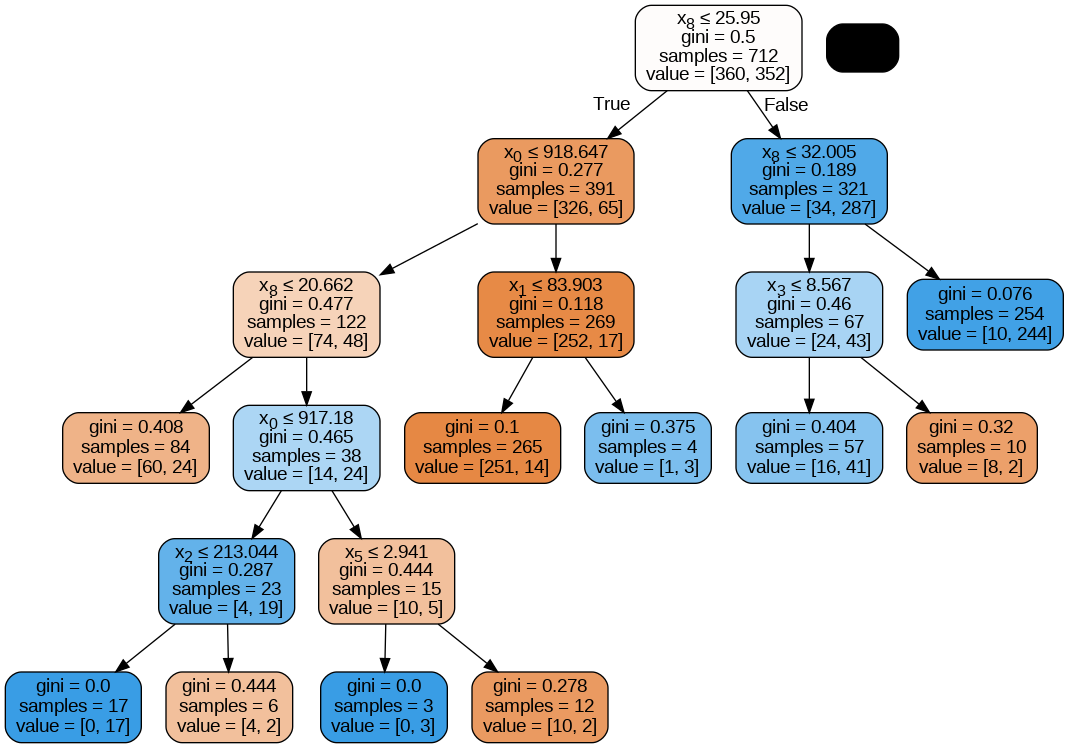

In [114]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(humidity_classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [115]:
humidity_classifier = DecisionTreeClassifier (max_leaf_nodes=10, random_state=0, criterion='entropy')
humidity_classifier. fit (X_train, y_train)
y_predicted = humidity_classifier.predict (X_test)
accuracy_score (y_test, y_predicted)*100

90.9090909090909

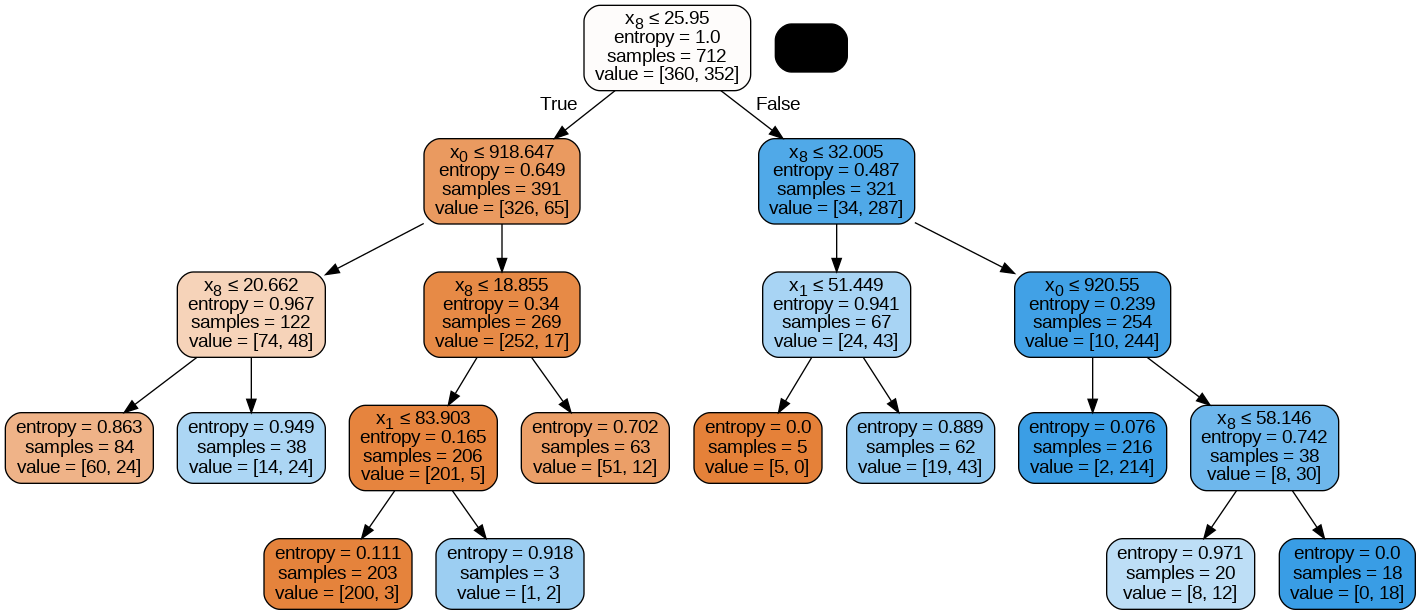

In [116]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(humidity_classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [117]:
humidity_classifier = DecisionTreeClassifier (max_leaf_nodes=100, random_state=0)
humidity_classifier. fit (X_train, y_train)
y_predicted = humidity_classifier.predict (X_test)
accuracy_score (y_test, y_predicted)*100

88.92045454545455

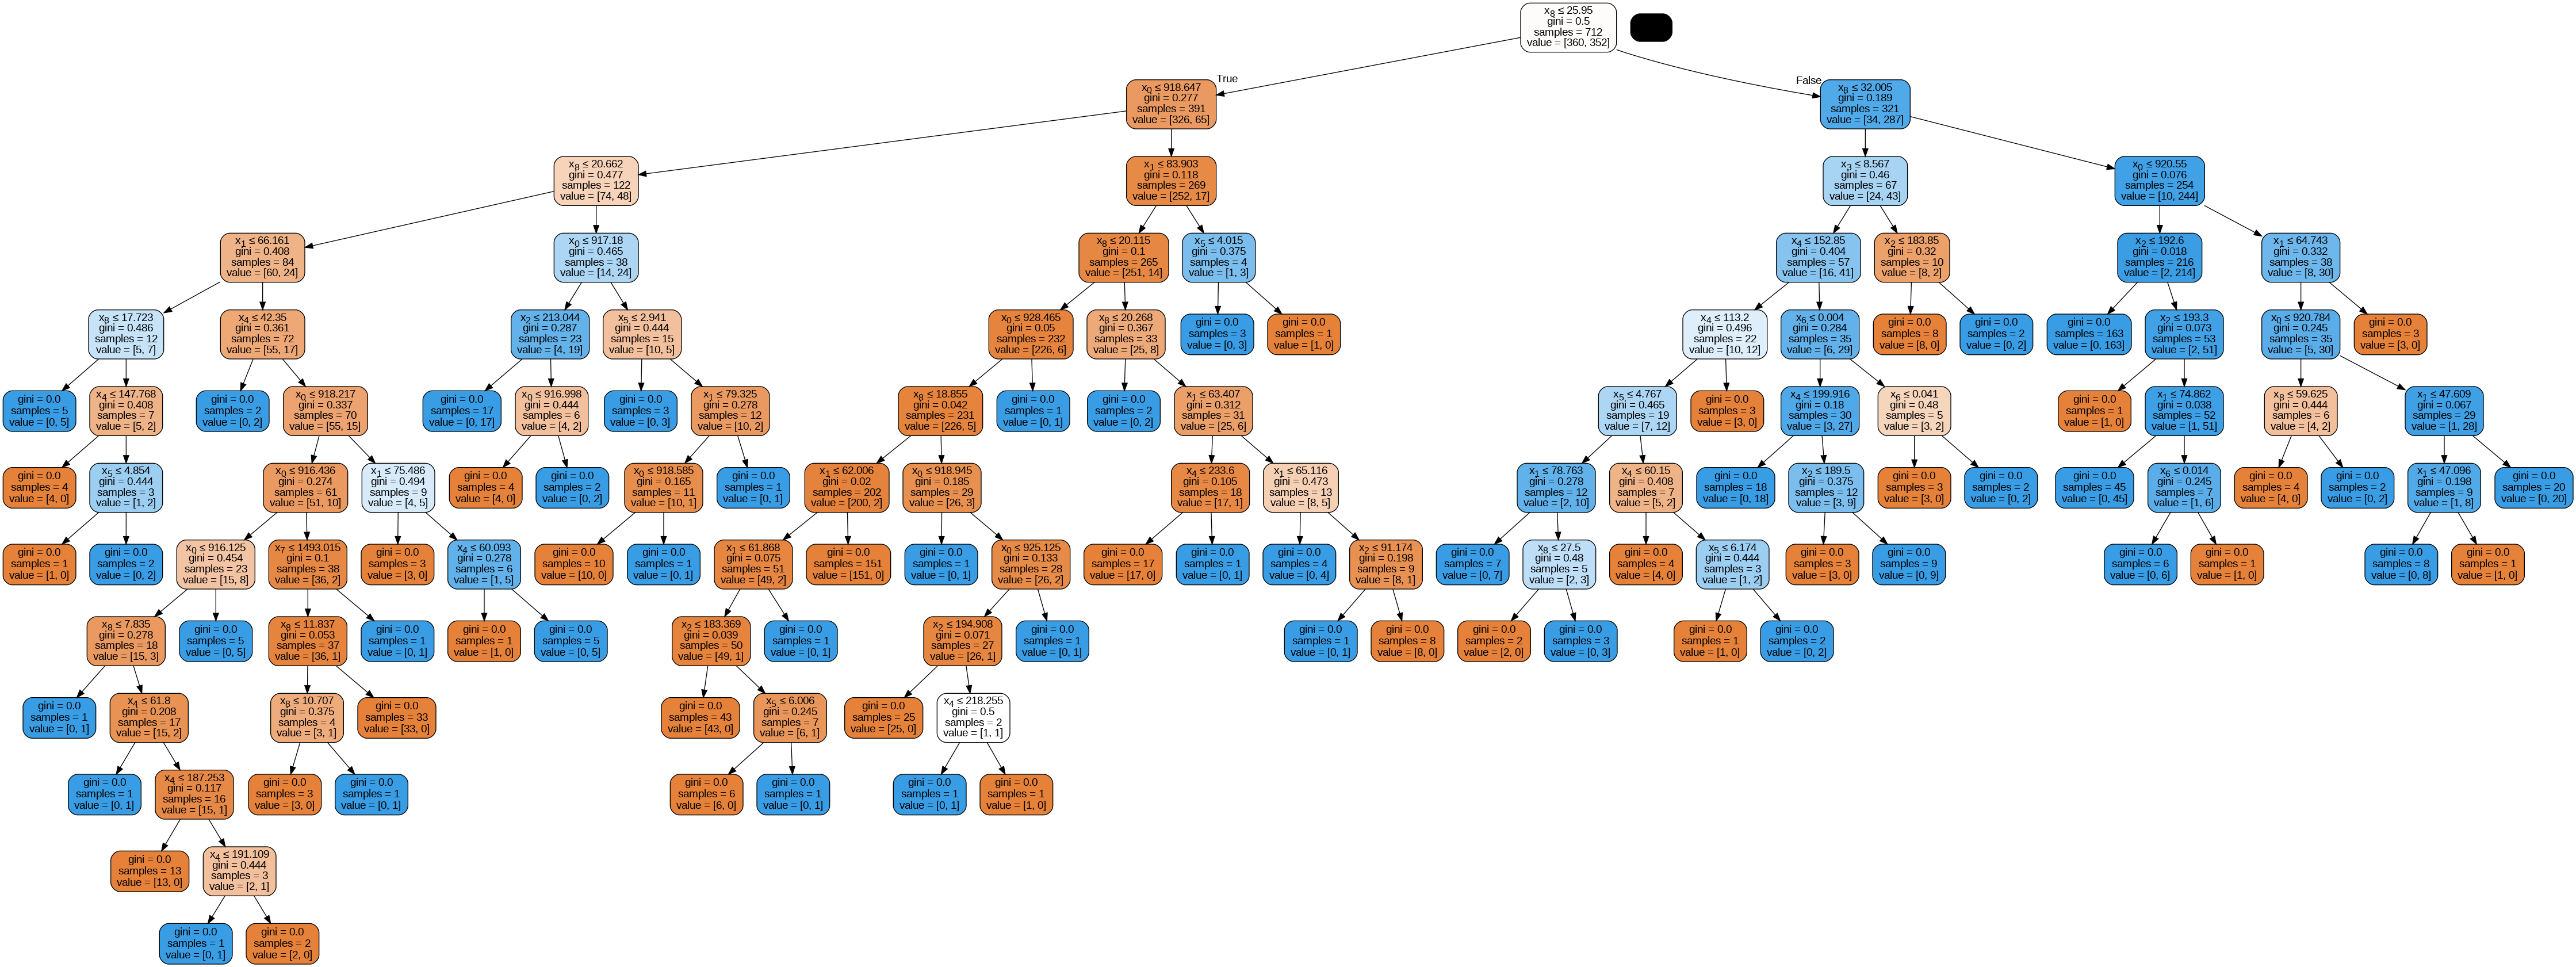

In [118]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(humidity_classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [119]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=100, random_state=0, max_depth=3)
humidity_classifier.fit(X_train, y_train)
y_predicted = humidity_classifier.predict(X_test)
accuracy_score(y_test, y_predicted) * 100

90.625

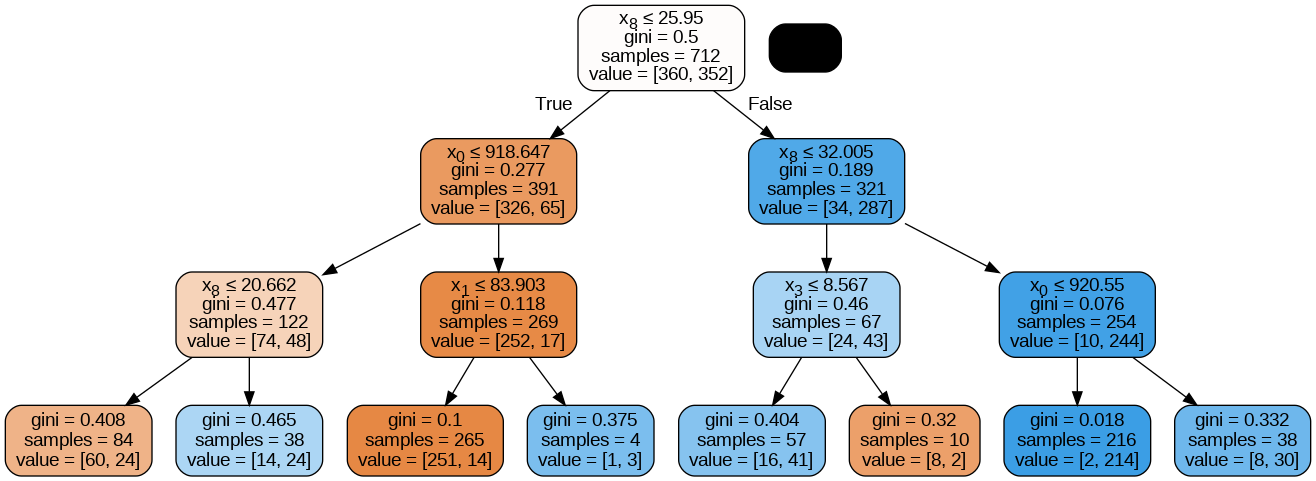

In [120]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(humidity_classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [121]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=100, random_state=0, max_depth=1)
humidity_classifier.fit(X_train, y_train)
y_predicted = humidity_classifier.predict(X_test)
accuracy_score(y_test, y_predicted) * 100

89.48863636363636

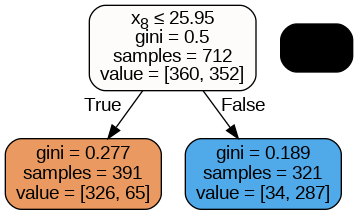

In [122]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(humidity_classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
